# Data Science Project

## 1


* **code_module** – code name of the module, which serves as the identifier.
* **code_presentation** – code name of the presentation. It consists of the year and “B” for the presentation starting in February and “J” for the presentation starting in October.
* **length** - length of the module-presentation in days.



In [1]:
import pandas as pd
import numpy as np
location=r"C:\Users\nevta\Desktop\Datasets\Project\courses.csv"
df=pd.read_csv(location)
df.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [2]:
df.duplicated().any()

False

In [3]:
df.isna().any()

code_module                   False
code_presentation             False
module_presentation_length    False
dtype: bool

    There is no duplicated or na values in the dataset.

In [4]:
df["Year"]=np.where(df["code_presentation"].str.contains("3"),2013,2014)
df["Semester"]=np.where(df["code_presentation"].str.contains("B"),"February","October")
df.head()

,code_module,code_presentation,module_presentation_length,Year,Semester
0,AAA,2013J,268,2013,October
1,AAA,2014J,269,2014,October
2,BBB,2013J,268,2013,October
3,BBB,2014J,262,2014,October
4,BBB,2013B,240,2013,February


I have used condition parameter becasue there is a two different variables,such as 2013 and 2014.

In [5]:
df["code_module"].groupby(df["Semester"]).count()

        

Semester
February     9
October     13
Name: code_module, dtype: int64

In [6]:
length_J=df["module_presentation_length"][df["Semester"].isin(["October"])]
length_J

0     268
1     269
2     268
3     262
6     269
8     261
9     262
12    268
13    269
15    268
16    269
19    261
20    269
Name: module_presentation_length, dtype: int64

In [7]:
length_B=df["module_presentation_length"][df["Semester"].isin(["February"])]
length_B

4     240
5     234
7     241
10    240
11    241
14    241
17    240
18    241
21    241
Name: module_presentation_length, dtype: int64

In [8]:
length_B.equals(length_J)

False

    While 13 courses started in October, 9 course started in February. Also, They are not equal in terms of length.

In [9]:
df["Year"].value_counts()

2014    13
2013     9
Name: Year, dtype: int64

    There is no year rather than 2014 and 2013, so I will observe these years.

In [10]:
df["code_module"][df["Semester"].isin(["October"])]


0     AAA
1     AAA
2     BBB
3     BBB
6     CCC
8     DDD
9     DDD
12    EEE
13    EEE
15    FFF
16    FFF
19    GGG
20    GGG
Name: code_module, dtype: object

In [11]:
df["code_module"][df["Semester"].isin(["February"])]

4     BBB
5     BBB
7     CCC
10    DDD
11    DDD
14    EEE
17    FFF
18    FFF
21    GGG
Name: code_module, dtype: object

In [12]:
df.groupby(["Semester","Year"]).sum()

module_presentation_length
Semester Year                            
February 2013                         720
         2014                        1439
October  2013                        1594
         2014                        1869

    If the length of the courses that were offered two years consecutively in the same semester were same, their summary would be also same. Therefore, they are not same in terms of module_presentation_length.

In [13]:
df["code_module"][df["Year"].isin([2013])]


0     AAA
2     BBB
4     BBB
8     DDD
10    DDD
12    EEE
15    FFF
17    FFF
19    GGG
Name: code_module, dtype: object

In [14]:
df["code_module"][df["Year"].isin([2014])]

1     AAA
3     BBB
5     BBB
6     CCC
7     CCC
9     DDD
11    DDD
13    EEE
14    EEE
16    FFF
18    FFF
20    GGG
21    GGG
Name: code_module, dtype: object

In [15]:
length_4=df["module_presentation_length"][df["Year"].isin([2014])]
length_3=df["module_presentation_length"][df["Year"].isin([2013])]
length_3.equals(length_4)


False

    They have different module_presentation_length.

### 2.


* **code_module** – an identification code for a module on which the student is registered.
* **code_presentation** - the identification code of the presentation during which the student is registered on the module.
* **id_student** – a unique identification number for the student.
* **gender** – the student’s gender.
* **region** – identifies the geographic region, where the student lived while taking the module-presentation.
* **highest_education** – highest student education level on entry to the module presentation.
* **imd_band** – specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
* **age_band** – band of the student’s age.
* **num_of_prev_attempts** – the number times the student has attempted this module.
* **studied_credits** – the total number of credits for the modules the student is currently studying.
* **disability** – indicates whether the student has declared a disability.
* **final_result** – student’s final result in the module-presentation.

In [16]:
location=r"C:\Users\nevta\Desktop\Datasets\Project\studentInfo.csv"
df2=pd.read_csv(location)
df2.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [17]:
df2.duplicated().any()

False

In [18]:
df2.isnull().any()

code_module             False
code_presentation       False
id_student              False
gender                  False
region                  False
highest_education       False
imd_band                 True
age_band                False
num_of_prev_attempts    False
studied_credits         False
disability              False
final_result            False
dtype: bool

In [19]:
df2.dropna(inplace=True)

In [20]:
df2["highest_education"].value_counts()

A Level or Equivalent          13762
Lower Than A Level             12762
HE Qualification                4444
No Formal quals                  328
Post Graduate Qualification      186
Name: highest_education, dtype: int64

In [21]:
df2["imd_band"].value_counts()

20-30%     3654
30-40%     3539
10-20      3516
0-10%      3311
40-50%     3256
50-60%     3124
60-70%     2905
70-80%     2879
80-90%     2762
90-100%    2536
Name: imd_band, dtype: int64

In [22]:
df2["age_band"].value_counts()

0-35     22272
35-55     9009
55<=       201
Name: age_band, dtype: int64

    For the highest_education column, I will merge two values which they are "No Formal quals" and "Post Graduate Qualification" because they have fewer values. For the imd_band column, I will reduce number of values to half of the existing number. 

In [23]:
new_rows={"A Level or Equivalent":"A Level or Equivalent",
             "Lower Than A Level":"Lower Than A Level","HE Qualification":"HE Qualification",
             "No Formal quals":"No Formal Quals","Post Graduate Qualification":"No Formal Quals"}

df2["highest_education"]=df2["highest_education"].map(new_rows)

In [24]:
df2["highest_education"].value_counts()

A Level or Equivalent    13762
Lower Than A Level       12762
HE Qualification          4444
No Formal Quals            514
Name: highest_education, dtype: int64

In [25]:
new_rows2={"0-10%":"0-20%","10-20":"0-20%","20-30%":"20-40%","30-40%":"20-40%",
           "40-50%":"40-60%" ,"50-60%":"40-60%","60-70%":"60-80%","70-80%":"60-80%",
           "80-90%":"80-100%" ,"90-100%":"80-100%"}
df2["imd_band"]=df2["imd_band"].map(new_rows2)
df2["imd_band"].value_counts()


20-40%     7193
0-20%      6827
40-60%     6380
60-80%     5784
80-100%    5298
Name: imd_band, dtype: int64

    There was too many range in imd-band. Hence, I have merged them, and decreased number to half of it.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
educ_fin=pd.crosstab(df2.final_result,df2.highest_education).reset_index()
educ_fin

highest_education,final_result,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal Quals
0,Distinction,1441,645,670,69
1,Fail,2674,751,3361,121
2,Pass,5658,1825,4213,134
3,Withdrawn,3989,1223,4518,190


<AxesSubplot:xlabel='final_result'>

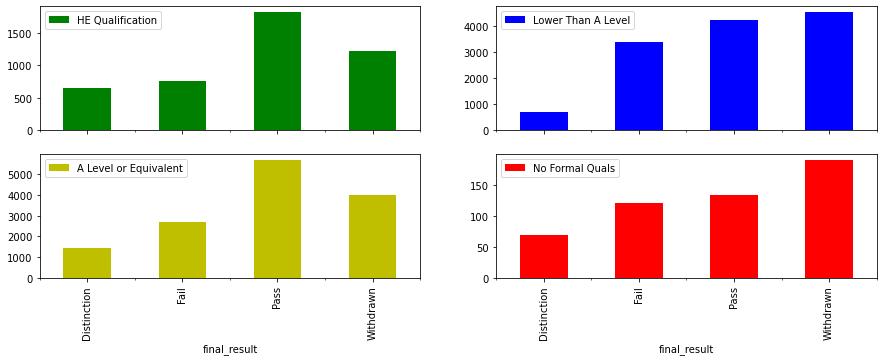

In [28]:
fig,axes=plt.subplots(2,2,figsize=(15,5),sharex=True)
educ_fin.plot.bar(ax=axes[0,0],x="final_result",y="HE Qualification",color="g")

educ_fin.plot.bar(ax=axes[1,0],x="final_result",y="A Level or Equivalent",color="y")
educ_fin.plot.bar(ax=axes[0,1],x="final_result",y="Lower Than A Level",color="b")
educ_fin.plot.bar(ax=axes[1,1],x="final_result",y="No Formal Quals",color="r")



In [29]:
educ_fin['A Level or Equivalent	'] = (educ_fin["A Level or Equivalent"] / 
                      educ_fin['A Level or Equivalent'].sum()) * 100
educ_fin['HE Qualification_percent'] = (educ_fin["HE Qualification"] / 
                      educ_fin['HE Qualification'].sum()) * 100



In [30]:
educ_fin.set_index("final_result",inplace=True)
educ_fin.loc[:,["A Level or Equivalent\t","HE Qualification_percent"]]

highest_education,A Level or Equivalent\t,HE Qualification_percent
final_result,,
Distinction,10.470862,14.513951
Fail,19.430315,16.899190
Pass,41.113210,41.066607
Withdrawn,28.985613,27.520252


    Lower Than A Level and No Formal Quals has lower pass percentage than other two columns as bar graph shows.However, A Level or Equivalent and He Qualification have similar graphs in terms of students who pass. Also, when they are compared in terms of final result percentage, students who have pass as a final result are not different in two categories. Hence, There is no differences for two columns in terms of passing the course.

In [31]:
imd_final=pd.crosstab(df2.imd_band,df2.final_result).reset_index()
imd_final

final_result,imd_band,Distinction,Fail,Pass,Withdrawn
0,0-20%,359,1828,2163,2477
1,20-40%,578,1628,2571,2416
2,40-60%,590,1398,2451,1941
3,60-80%,612,1137,2379,1656
4,80-100%,686,916,2266,1430


([<matplotlib.patches.Wedge at 0x14c8197b1f0>,
 [Text(0.8085652464699666, 0.8866917402349941, '0-20%'),
  Text(-0.8876106216872955, 0.8075564279156553, '20-40%'),
  Text(-0.9638439177544755, -0.7148460688901522, '40-60%'),
  Text(0.2623098701411764, -1.170979731689033, '60-80%'),
  Text(1.0973469921547394, -0.48562287714742847, '80-100%')],
 [Text(0.4716630604408138, 0.5172368484704132, '26%'),
  Text(-0.5177728626509224, 0.47107458295079885, '24%'),
  Text(-0.5622422853567772, -0.41699354018592205, '20%'),
  Text(0.15301409091568624, -0.6830715101519358, '16%'),
  Text(0.6401190787569312, -0.28328001166933325, '13%')])

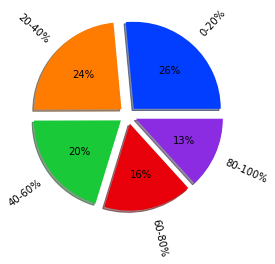

In [32]:
label=["0-20%","20-40%","40-60%","60-80%","80-100%"]
colors = sns.color_palette('bright')
plt.pie(imd_final["Fail"],labels=label, colors=colors,autopct='%.0f%%',shadow=True,rotatelabels='true',explode=[0.1,0.1,0.1,0.1,0.1])

As pie chart shows, when imd_band was getting in a  lower range, student fail percentage becomes higher. Hence, it is easy to argue there is a negative correlation. Also, although statistical analysis can easily support this argument, I have not used statistical tools to be more understandable. 


In [33]:
Ability_final=pd.crosstab(df2["final_result"],df2["disability"]).reset_index()
Ability_final



disability,final_result,N,Y
0,Distinction,2608,217
1,Fail,6198,709
2,Pass,10860,970
3,Withdrawn,8685,1235


<AxesSubplot:xlabel='final_result'>

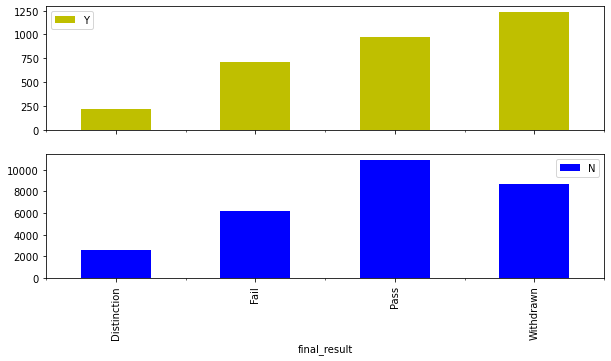

In [34]:
fig,axes=plt.subplots(2,1,figsize=(10,5),sharex=True)
Ability_final.plot.bar(ax=axes[0],x="final_result",y="Y",color="y")
Ability_final.plot.bar(ax=axes[1],x="final_result",y="N",color="b")




([<matplotlib.patches.Wedge at 0x14c81ad2be0>,
 [Text(1.0740283613533992, 0.2376196098989567, 'Distinction'),
  Text(0.4524796694524402, 1.0026276221669792, 'Fail'),
  Text(-1.0475517134036296, 0.335611989870922, 'Pass'),
  Text(0.3581308894231336, -1.0400683948861227, 'Withdrawn')],
 [Text(0.5858336516473086, 0.12961069630852182, '7%'),
  Text(0.24680709242860374, 0.5468877939092612, '23%'),
  Text(-0.5713918436747071, 0.18306108538413926, '31%'),
  Text(0.1953441215035274, -0.5673100335742486, '39%')])

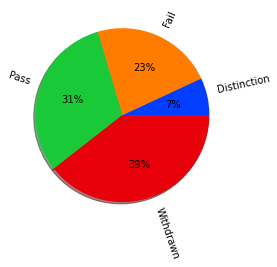

In [35]:


labels=["Distinction", "Fail", "Pass","Withdrawn"]


plt.pie(Ability_final["Y"],labels=labels, colors=colors,autopct='%.0f%%',shadow=True,rotatelabels='true')

([<matplotlib.patches.Wedge at 0x14c81d07520>,
 [Text(1.0543841089887467, 0.313487082209151, 'Distinction'),
  Text(0.3313752934047491, 1.0488996209937902, 'Fail'),
  Text(-1.0999011233515579, -0.014748520264124362, 'Pass'),
  Text(0.628716152067862, -0.902616197577343, 'Withdrawn')],
 [Text(0.5751186049029526, 0.17099295393226419, '9%'),
  Text(0.18075016003895403, 0.5721270659966128, '22%'),
  Text(-0.5999460672826679, -0.008044647416795106, '38%'),
  Text(0.34293608294610656, -0.4923361077694598, '31%')])

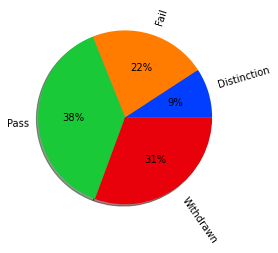

In [36]:
plt.pie(Ability_final["N"],labels=labels, colors=colors,autopct='%.0f%%',shadow=True,rotatelabels='true')

As bar graph shows, students who have disability witdraw much more than pass the course( %39-%31). On the other hand, students who have no disability pass the course much more than withdrawn. Hence, Being disability has an effect on passing the course. 

### 3. 

In [37]:
location3=r"C:\Users\nevta\Desktop\Datasets\Project\studentRegistration.csv"
df3=pd.read_csv(location3)
df3.tail()

,code_module,code_presentation,id_student,date_registration,date_unregistration
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0
32592,GGG,2014J,2684003,-28.0,NaN



* **code_module** – an identification code for a module.
* **code_presentation** - the identification code of the presentation.
* **id_student** – a unique identification number for the student.
* **date_registration** – the date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation (e.g. the negative value -30 means that the student registered to module presentation 30 days before it started).
* **date_unregistration** – date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have *Withdrawal* as the value of the `final_result` column in the `studentInfo.csv` file.

In [38]:
df2.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,80-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-40%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,20-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,40-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,40-60%,0-35,0,60,N,Pass


In [39]:
df3.shape

(32593, 5)

In [40]:
mergedf2=df2[["id_student","final_result"]]
merged=pd.merge(df3,mergedf2,on="id_student",how="inner")
merged


,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result
0,AAA,2013J,11391,-159.0,NaN,Pass
1,AAA,2013J,28400,-53.0,NaN,Pass
2,AAA,2013J,30268,-92.0,12.0,Withdrawn
3,AAA,2013J,31604,-52.0,NaN,Pass
4,AAA,2013J,32885,-176.0,NaN,Pass
...,...,...,...,...,...,...
39395,GGG,2014J,2640965,-4.0,NaN,Fail
39396,GGG,2014J,2645731,-23.0,NaN,Distinction
39397,GGG,2014J,2648187,-129.0,NaN,Pass
39398,GGG,2014J,2679821,-49.0,101.0,Withdrawn


In [41]:
condition=merged[( merged["date_unregistration"].notnull())&( merged["final_result"]!="Withdrawn")]
condition

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result
15,AAA,2013J,65002,-180.0,96.0,Fail
24,AAA,2013J,94961,-170.0,72.0,Pass
54,AAA,2013J,135400,-32.0,144.0,Pass
60,AAA,2013J,141377,-110.0,129.0,Pass
73,AAA,2013J,148993,-174.0,158.0,Pass
...,...,...,...,...,...,...
37568,GGG,2013J,600320,-37.0,167.0,Pass
37623,GGG,2013J,602655,-60.0,5.0,Distinction
38322,GGG,2014B,624767,-24.0,212.0,Distinction
38393,GGG,2014B,627812,-23.0,119.0,Distinction


In [42]:
condition["final_result"]="Withdrawn"

C:\Users\nevta\AppData\Local\Temp\ipykernel_11568\1356935837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition["final_result"]="Withdrawn"


In [43]:
merged["final_result"][( merged["date_unregistration"].notnull())&( merged["final_result"]!="Withdrawn")]=condition.loc[:,"final_result"]="Withdrawn"

C:\Users\nevta\AppData\Local\Temp\ipykernel_11568\3556686322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["final_result"][( merged["date_unregistration"].notnull())&( merged["final_result"]!="Withdrawn")]=condition.loc[:,"final_result"]="Withdrawn"
C:\Users\nevta\AppData\Local\Temp\ipykernel_11568\3556686322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged["final_result"][( merged["date_unregistration"].notnull())&( merged["final_result"]!="Withdrawn")]=condition.loc[:,"final_result"]="Withdrawn"


In [44]:
condition

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result
15,AAA,2013J,65002,-180.0,96.0,Withdrawn
24,AAA,2013J,94961,-170.0,72.0,Withdrawn
54,AAA,2013J,135400,-32.0,144.0,Withdrawn
60,AAA,2013J,141377,-110.0,129.0,Withdrawn
73,AAA,2013J,148993,-174.0,158.0,Withdrawn
...,...,...,...,...,...,...
37568,GGG,2013J,600320,-37.0,167.0,Withdrawn
37623,GGG,2013J,602655,-60.0,5.0,Withdrawn
38322,GGG,2014B,624767,-24.0,212.0,Withdrawn
38393,GGG,2014B,627812,-23.0,119.0,Withdrawn


In [45]:
df3=merged
df3

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result
0,AAA,2013J,11391,-159.0,NaN,Pass
1,AAA,2013J,28400,-53.0,NaN,Pass
2,AAA,2013J,30268,-92.0,12.0,Withdrawn
3,AAA,2013J,31604,-52.0,NaN,Pass
4,AAA,2013J,32885,-176.0,NaN,Pass
...,...,...,...,...,...,...
39395,GGG,2014J,2640965,-4.0,NaN,Fail
39396,GGG,2014J,2645731,-23.0,NaN,Distinction
39397,GGG,2014J,2648187,-129.0,NaN,Pass
39398,GGG,2014J,2679821,-49.0,101.0,Withdrawn


I have changed some values which should be withdrawn.

In [46]:
label=["Very early-comers","Earlier-comers","Early-comers","In-time-comers","Late-comers"]
bin=[-323,-200,-90,-30,0,168]
categorized_by_df3=pd.cut(df3["date_registration"],bin, labels=label)
df3["cut_regist"]=categorized_by_df3
df3.head()


,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result,cut_regist
0,AAA,2013J,11391,-159.0,NaN,Pass,Earlier-comers
1,AAA,2013J,28400,-53.0,NaN,Pass,Early-comers
2,AAA,2013J,30268,-92.0,12.0,Withdrawn,Earlier-comers
3,AAA,2013J,31604,-52.0,NaN,Pass,Early-comers
4,AAA,2013J,32885,-176.0,NaN,Pass,Earlier-comers


     I have categorized date registration.

In [47]:
label=["before-start","first half-year","second half-and later-year"]
bin=[-366,0,180,365]
categorized_unregist=pd.cut(df3["date_unregistration"],bin,labels=label)
df3["cut_unregist"]=categorized_unregist
df3.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result,cut_regist,cut_unregist
0,AAA,2013J,11391,-159.0,NaN,Pass,Earlier-comers,NaN
1,AAA,2013J,28400,-53.0,NaN,Pass,Early-comers,NaN
2,AAA,2013J,30268,-92.0,12.0,Withdrawn,Earlier-comers,first half-year
3,AAA,2013J,31604,-52.0,NaN,Pass,Early-comers,NaN
4,AAA,2013J,32885,-176.0,NaN,Pass,Earlier-comers,NaN


    I have categorized date unregistration in three different category.

In [48]:
merged2=pd.merge(df3.loc[:,"id_student":],df2[["id_student","gender","highest_education","disability"]],on="id_student",how="outer")
merged2

,id_student,date_registration,date_unregistration,final_result,cut_regist,cut_unregist,gender,highest_education,disability
0,11391,-159.0,NaN,Pass,Earlier-comers,NaN,M,HE Qualification,N
1,28400,-53.0,NaN,Pass,Early-comers,NaN,F,HE Qualification,N
2,30268,-92.0,12.0,Withdrawn,Earlier-comers,first half-year,F,A Level or Equivalent,Y
3,31604,-52.0,NaN,Pass,Early-comers,NaN,F,A Level or Equivalent,N
4,32885,-176.0,NaN,Pass,Earlier-comers,NaN,F,Lower Than A Level,N
...,...,...,...,...,...,...,...,...,...
57139,2640965,-4.0,NaN,Fail,In-time-comers,NaN,F,Lower Than A Level,N
57140,2645731,-23.0,NaN,Distinction,In-time-comers,NaN,F,Lower Than A Level,N
57141,2648187,-129.0,NaN,Pass,Earlier-comers,NaN,F,A Level or Equivalent,Y
57142,2679821,-49.0,101.0,Withdrawn,Early-comers,first half-year,F,Lower Than A Level,N


In [49]:
a=pd.crosstab(merged2.gender,merged2.cut_regist).reset_index()
a


cut_regist,gender,Very early-comers,Earlier-comers,Early-comers,In-time-comers,Late-comers
0,F,357,6279,9294,4755,231
1,M,740,11505,14786,8911,180


<AxesSubplot:xlabel='gender', ylabel='Late-comers'>

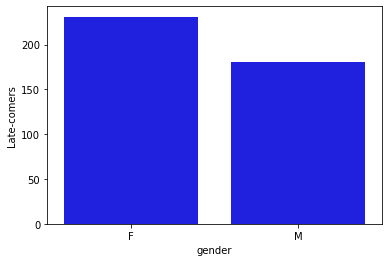

In [50]:
sns.barplot(data=a,x="gender",y="Late-comers",color="b")

Among late-comers, Female registered much more than male.

In [51]:
c=merged2[["date_unregistration"]].groupby(merged2["highest_education"]).mean().reset_index()
d=merged2[["date_registration"]].groupby(merged2["highest_education"]).mean().reset_index()
c

,highest_education,date_unregistration
0,A Level or Equivalent,53.583703
1,HE Qualification,58.942540
2,Lower Than A Level,51.250498
3,No Formal Quals,56.340037


In [52]:
d

,highest_education,date_registration
0,A Level or Equivalent,-73.314047
1,HE Qualification,-68.821784
2,Lower Than A Level,-75.454178
3,No Formal Quals,-71.350177


While the categories with the two highest education levels,A Level or Equivalent and Lower Than A Level, act together, the categories with the two lowest education levels act similarly together. For instance, students who have higher education unregistered earlier than lower education level. Also, higher two categories registered earlier than lower two categories in terms of mean values.

<AxesSubplot:xlabel='cut_unregist', ylabel='N'>

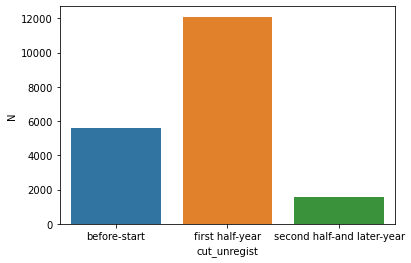

In [53]:
e=pd.crosstab(merged2.cut_unregist,merged2.disability).reset_index()
sns.barplot(x="cut_unregist",y="N",data=e)

<AxesSubplot:xlabel='cut_unregist', ylabel='Y'>

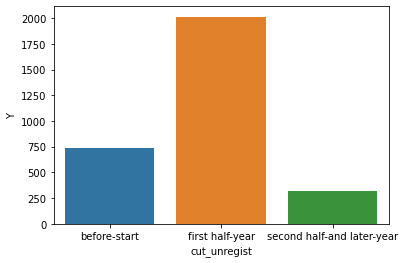

In [54]:
sns.barplot(x="cut_unregist",y="Y",data=e)

There is no relationship between the time when they are unregistered and students's disability

### 4. 



* **id_site** – an identification number of the material.
* **code_module** – an identification code for module.
* **code_presentation** - the identification code of presentation.
* **activity_type** – the role associated with the module material.
* **week_from** – the week from which the material is planned to be used.
* **week_to** – week until which the material is planned to be used.

In [55]:
location4=r"C:\Users\nevta\Desktop\Datasets\Project\moodle.csv"
df4=pd.read_csv(location4)
print(df4.head())
df4.shape

   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
3   546888         AAA             2013J           url        NaN      NaN
4   547035         AAA             2013J      resource        NaN      NaN


(6364, 6)

In [56]:
df4.dropna(axis=1,inplace=True)
df4.head()

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource


In [57]:
df4["activity_type"].value_counts().head()

resource     2660
subpage      1055
oucontent     996
url           886
forumng       194
Name: activity_type, dtype: int64

In [58]:
df4["code_module"].value_counts().head()

FFF    1967
DDD    1708
BBB    1154
CCC     419
AAA     413
Name: code_module, dtype: int64

In [59]:
filtered=df4[df4["activity_type"].isin(["resource","subpage","oucontent","url","forumng"])]
filtered

,id_site,code_module,code_presentation,activity_type
0,546943,AAA,2013J,resource
1,546712,AAA,2013J,oucontent
2,546998,AAA,2013J,resource
3,546888,AAA,2013J,url
4,547035,AAA,2013J,resource
...,...,...,...,...
6359,897063,GGG,2014J,resource
6360,897109,GGG,2014J,resource
6361,896965,GGG,2014J,oucontent
6362,897060,GGG,2014J,resource


In [60]:
filtered=filtered.drop(columns=["id_site"])
filtered

,code_module,code_presentation,activity_type
0,AAA,2013J,resource
1,AAA,2013J,oucontent
2,AAA,2013J,resource
3,AAA,2013J,url
4,AAA,2013J,resource
...,...,...,...
6359,GGG,2014J,resource
6360,GGG,2014J,resource
6361,GGG,2014J,oucontent
6362,GGG,2014J,resource


In [61]:
grouped_activity=filtered.groupby(["activity_type","code_presentation","code_module"]).size().to_frame()
grouped_activity

0
activity_type code_presentation code_module     
forumng       2013B             BBB           17
                                DDD           11
                                FFF            5
              2013J             AAA           15
                                BBB           19
...                                          ...
url           2014J             BBB            6
                                CCC           19
                                DDD           46
                                EEE            7
                                FFF          132

[107 rows x 1 columns]

In [62]:
grouped_activity=grouped_activity.unstack("activity_type")
grouped_activity

0                                  
activity_type                 forumng oucontent resource subpage    url
code_presentation code_module                                          
2013B             BBB            17.0       1.0    236.0    37.0   15.0
                  DDD            11.0       6.0    182.0   114.0   92.0
                  FFF             5.0     108.0    129.0    55.0  125.0
2013J             AAA            15.0      68.0     95.0     6.0   18.0
                  BBB            19.0       3.0    236.0    38.0   15.0
                  DDD            16.0      13.0    178.0   194.0   44.0
                  EEE             5.0      48.0     34.0     7.0    7.0
                  FFF             7.0     107.0    136.0    55.0  132.0
                  GGG             2.0      24.0     95.0     5.0    NaN
2014B             BBB            17.0       3.0    231.0    37.0   14.0
                  CCC             9.0      47.0     78.0    28.0   13.0
                  DDD            13.0      13.0    177.0   193.0   41.0
                  EEE             5.0      46.0     32.0     7.0    7.0
                  FFF             6.0     101.0    109.0    53.0  133.0
                  GGG             2.0      25.0     81.0     5.0    NaN
2014J             AAA             6.0      68.0     93.0     6.0   20.0
                  BBB             3.0      70.0    104.0    10.0    6.0
                  CCC             9.0      58.0     85.0    31.0   19.0
                  DDD            13.0      13.0    169.0   110.0   46.0
                  EEE             5.0      45.0     37.0     7.0    7.0
                  FFF             7.0     103.0     80.0    52.0  132.0
                  GGG             2.0      26.0     63.0     5.0    NaN

    This table is categorized by each offering (code_presentation) of each course (code_module), and it shows how many times five popular activity type include these categorize. To summary of table, there is no all modules in every year, and although some modules started in February, the same started in Octobor in the next year. Also, url never corresponds "GGG" in any years 

### 5. 

In [63]:
location5=r"C:\Users\nevta\Desktop\Datasets\Project\studentMoodleInteract.csv"
df5=pd.read_csv(location5)
print(df5.head())


print(df5.shape)

  code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1
(10655280, 6)



* **code_module** – an identification code for a module.
* **code_presentation** - the identification code of the module presentation.
* **id_student** – a unique identification number for the student.
* **id_site** - an identification number for the course material/component.
* **date** – the date of student’s interaction with the material measured as the number of days since the start of the module-presentation.
* **sum_click** – the number of times a student interacts with the material in that day.

In [64]:
df5.duplicated().any()

True

In [65]:
df5.drop_duplicates(inplace=True)

In [66]:
df5["Semester"]=np.nan
df5["Semester"][df5["code_presentation"].str.contains("B")]="B"
df5["Semester"][df5["code_presentation"].str.contains("J")]="J"
df5.head()



C:\Users\nevta\AppData\Local\Temp\ipykernel_11568\479684336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["Semester"][df5["code_presentation"].str.contains("B")]="B"


,code_module,code_presentation,id_student,id_site,date,sum_click,Semester
0,AAA,2013J,28400,546652,-10,4,J
1,AAA,2013J,28400,546652,-10,1,J
3,AAA,2013J,28400,546614,-10,11,J
4,AAA,2013J,28400,546714,-10,1,J
5,AAA,2013J,28400,546652,-10,8,J


In [67]:
click=df5.pivot_table(index="Semester",columns="code_module",values="sum_click",aggfunc="sum")
click

code_module,AAA,BBB,CCC,DDD,EEE,FFF,GGG
Semester,,,,,,,
B,NaN,2060501.0,1818259.0,2265909.0,813602.0,7025328.0,402229.0
J,1213982.0,2919519.0,2683561.0,3075430.0,3067306.0,10133766.0,863671.0


<AxesSubplot:xlabel='Semester'>

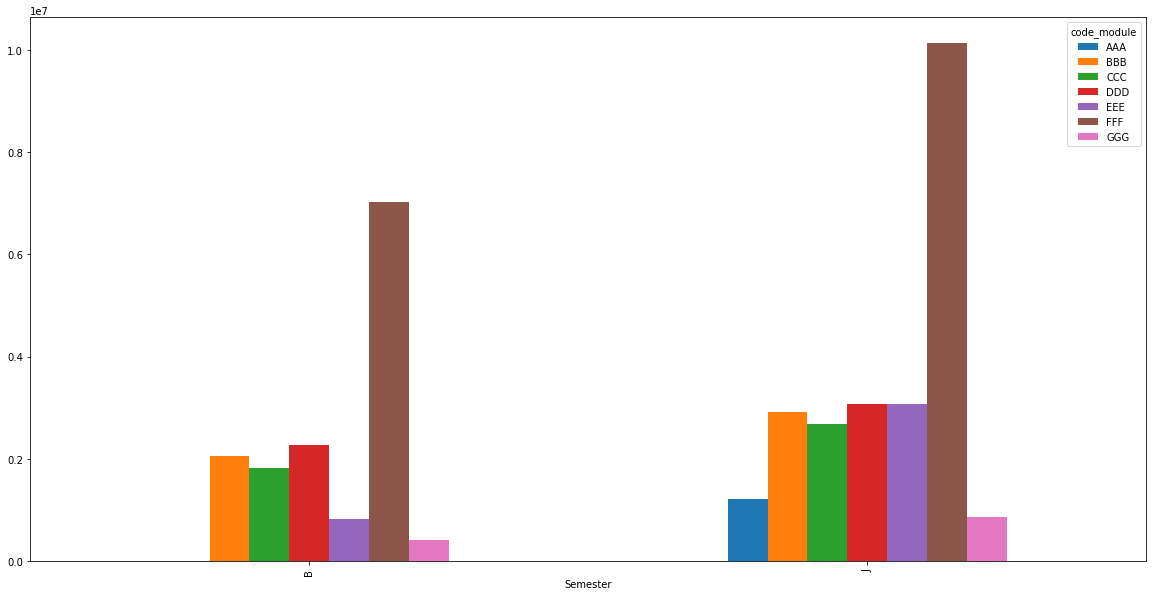

In [68]:
click[["AAA","BBB","CCC","DDD","EEE","FFF","GGG"]].plot.bar(figsize=(20,10))

    In the graphs, FFF module is clicked much more than rest of the courses. Also, when we compare semester, people generally click much more in February.  

In [69]:
df5["Year"]=np.nan
df5["Year"][df5["code_presentation"].str.contains("3")]="2013"
df5["Year"][df5["code_presentation"].str.contains("4")]="2014"
df5.head()



C:\Users\nevta\AppData\Local\Temp\ipykernel_11568\3132110579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["Year"][df5["code_presentation"].str.contains("3")]="2013"


,code_module,code_presentation,id_student,id_site,date,sum_click,Semester,Year
0,AAA,2013J,28400,546652,-10,4,J,2013
1,AAA,2013J,28400,546652,-10,1,J,2013
3,AAA,2013J,28400,546614,-10,11,J,2013
4,AAA,2013J,28400,546714,-10,1,J,2013
5,AAA,2013J,28400,546652,-10,8,J,2013


In [70]:
filter2=df5[["code_module","Year","Semester","sum_click"]]
filter2

,code_module,Year,Semester,sum_click
0,AAA,2013,J,4
1,AAA,2013,J,1
3,AAA,2013,J,11
4,AAA,2013,J,1
5,AAA,2013,J,8
...,...,...,...,...
10655274,GGG,2014,J,2
10655275,GGG,2014,J,3
10655276,GGG,2014,J,1
10655277,GGG,2014,J,3


In [71]:
grouped=filter2.groupby(["code_module","Year","Semester"]).sum()
grouped

sum_click
code_module Year Semester           
AAA         2013 J            633235
            2014 J            580747
BBB         2013 B           1271410
                 J           1300682
            2014 B            789091
                 J           1618837
CCC         2014 B           1818259
                 J           2683561
DDD         2013 B           1349853
                 J           1700459
            2014 B            916056
                 J           1374971
EEE         2013 J           1503071
            2014 B            813602
                 J           1564235
FFF         2013 B           4126024
                 J           4986423
            2014 B           2899304
                 J           5147343
GGG         2013 J            482552
            2014 B            402229
                 J            381119

In [72]:
grouped.pivot_table(index="code_module",columns="Year",values="sum_click",aggfunc="mean")

Year,2013,2014
code_module,,
AAA,633235.0,580747.0
BBB,1286046.0,1203964.0
CCC,NaN,2250910.0
DDD,1525156.0,1145513.5
EEE,1503071.0,1188918.5
FFF,4556223.5,4023323.5
GGG,482552.0,391674.0


    All clicks are smaller in 2014 as compared to 2013. Hence, there is no course that clicked more in 2014. As an exception ,  We can take "CCC" into account since it has no clicked data in 2013.

In [73]:
df5.shape

(9868110, 8)

In [74]:
df4.drop_duplicates(inplace=True)
df5.drop_duplicates(inplace=(True))

In [75]:
df4.shape

(6364, 4)

In [76]:
df_last=pd.merge(df5,df4,on=["id_site","code_module","code_presentation"])
df_last.shape

(9868110, 9)

In [77]:
df_last[["sum_click"]].groupby(df_last["activity_type"]).sum().sort_values(by="sum_click")

,sum_click
activity_type,
repeatactivity,9
sharedsubpage,171
folder,5420
htmlactivity,9239
dualpane,20716
ouelluminate,33220
dataplus,43731
questionnaire,56190
page,63631


    Outcontent is clicked much more than other types.

In [78]:
pivot_last=pd.pivot_table(index="code_module",columns="activity_type",values="sum_click",aggfunc="sum",data=df_last)
pivot_last

activity_type,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
code_module,,,,,,,,,,,,,,,,,,,,
AAA,3378.0,NaN,NaN,NaN,311412.0,656.0,266720.0,NaN,475.0,516732.0,NaN,NaN,NaN,NaN,NaN,NaN,14650.0,NaN,71582.0,28377.0
BBB,NaN,NaN,NaN,NaN,1955861.0,9802.0,1136792.0,NaN,11124.0,899617.0,1273.0,NaN,NaN,3757.0,394156.0,NaN,208373.0,171.0,273600.0,85494.0
CCC,NaN,NaN,NaN,NaN,584715.0,NaN,756032.0,NaN,8906.0,491478.0,NaN,NaN,4188.0,NaN,2076322.0,NaN,209624.0,NaN,342574.0,27981.0
DDD,NaN,NaN,64292.0,NaN,1339500.0,63336.0,1433206.0,NaN,49145.0,666533.0,11518.0,273566.0,1536.0,NaN,NaN,NaN,295160.0,NaN,979982.0,163565.0
EEE,NaN,4871.0,NaN,NaN,728224.0,NaN,654525.0,NaN,6460.0,1506118.0,NaN,440857.0,879.0,NaN,313108.0,NaN,49351.0,NaN,83270.0,93245.0
FFF,40353.0,15845.0,NaN,5420.0,2132742.0,6142.0,2418335.0,9239.0,24194.0,6526657.0,20429.0,155020.0,57028.0,52433.0,3691277.0,9.0,228172.0,NaN,1607759.0,168040.0
GGG,NaN,NaN,NaN,NaN,219902.0,7992.0,283454.0,NaN,NaN,471060.0,NaN,NaN,NaN,NaN,161059.0,NaN,69618.0,NaN,52815.0,NaN


In [79]:
pivot_last[["resource","quiz"]]

activity_type,resource,quiz
code_module,,
AAA,14650.0,NaN
BBB,208373.0,394156.0
CCC,209624.0,2076322.0
DDD,295160.0,NaN
EEE,49351.0,313108.0
FFF,228172.0,3691277.0
GGG,69618.0,161059.0


In [80]:
pivot_last[["subpage","url"]]

activity_type,subpage,url
code_module,,
AAA,71582.0,28377.0
BBB,273600.0,85494.0
CCC,342574.0,27981.0
DDD,979982.0,163565.0
EEE,83270.0,93245.0
FFF,1607759.0,168040.0
GGG,52815.0,NaN


    Although, most of the courses have similar patterns, it is hard to say that all courses have similarity. For instcance, quiz is clicked much more in two course than resources although it has two nan values.

In [81]:
df_last.groupby(["id_student","code_module","code_presentation"]).sum()

id_site   date  sum_click
id_student code_module code_presentation                             
6516       AAA         2014J              548311541  69412       2715
8462       DDD         2013J              197470449  11030        634
                       2014J                2441691     30          9
11391      AAA         2013J              104966141  19517        922
23629      BBB         2013B               27685949   2078        153
...                                             ...    ...        ...
2698257    AAA         2013J              137219916  23304        723
2698535    CCC         2014B              134285337   9234        780
           EEE         2013J              384073973  53334       3420
2698577    BBB         2014J              201406427  20072        695
2698588    BBB         2014J              195358003  29654        580

[29228 rows x 3 columns]

In [82]:
pivot_last2=pd.pivot_table(index=["id_student","code_module","Year","Semester"],columns="activity_type",values="sum_click",data=df_last[["id_student","code_module","Year","Semester","activity_type","sum_click"]])
pivot_last2

activity_type                         dataplus  dualpane  externalquiz  \
id_student code_module Year Semester                                     
6516       AAA         2014 J             5.25       NaN           NaN   
8462       DDD         2013 J              NaN       NaN      1.333333   
                       2014 J              NaN       NaN           NaN   
11391      AAA         2013 J              NaN       NaN           NaN   
23629      BBB         2013 B              NaN       NaN           NaN   
...                                        ...       ...           ...   
2698257    AAA         2013 J              NaN       NaN           NaN   
2698535    CCC         2014 B              NaN       NaN           NaN   
           EEE         2013 J              NaN       2.0           NaN   
2698577    BBB         2014 J              NaN       NaN           NaN   
2698588    BBB         2014 J              NaN       NaN           NaN   

activity_type                         folder   forumng  glossary  homepage  \
id_student code_module Year Semester                                         
6516       AAA         2014 J            NaN  2.800000       NaN  3.145570   
8462       DDD         2013 J            NaN  1.928571       NaN  3.538462   
                       2014 J            NaN  1.000000       NaN  7.000000   
11391      AAA         2013 J            NaN  3.770833       NaN  3.450000   
23629      BBB         2013 B            NaN  3.863636       NaN  2.250000   
...                                      ...       ...       ...       ...   
2698257    AAA         2013 J            NaN  2.682540       NaN  2.462687   
2698535    CCC         2014 B            NaN  5.220339       NaN  2.882353   
           EEE         2013 J            NaN  6.183280       NaN  3.688679   
2698577    BBB         2014 J            NaN  5.150000       NaN  5.513514   
2698588    BBB         2014 J            NaN  2.695652       NaN  3.717391   

activity_type                         htmlactivity  oucollaborate  oucontent  \
id_student code_module Year Semester                                           
6516       AAA         2014 J                  NaN            NaN   8.175824   
8462       DDD         2013 J                  NaN       1.714286   2.520000   
                       2014 J                  NaN       1.000000        NaN   
11391      AAA         2013 J                  NaN            NaN   7.089744   
23629      BBB         2013 B                  NaN            NaN        NaN   
...                                            ...            ...        ...   
2698257    AAA         2013 J                  NaN            NaN   3.727273   
2698535    CCC         2014 B                  NaN            NaN   1.500000   
           EEE         2013 J                  NaN            NaN   3.984536   
2698577    BBB         2014 J                  NaN       1.666667   2.377551   
2698588    BBB         2014 J                  NaN       1.000000   3.208955   

activity_type                         ouelluminate  ouwiki  page  \
id_student code_module Year Semester                               
6516       AAA         2014 J                  NaN     NaN   NaN   
8462       DDD         2013 J                  NaN     4.0   NaN   
                       2014 J                  NaN     NaN   NaN   
11391      AAA         2013 J                  NaN     NaN   NaN   
23629      BBB         2013 B                  NaN     NaN   NaN   
...                                            ...     ...   ...   
2698257    AAA         2013 J                  NaN     NaN   NaN   
2698535    CCC         2014 B                  NaN     NaN   NaN   
           EEE         2013 J                  NaN    11.9   NaN   
2698577    BBB         2014 J                  NaN     NaN   NaN   
2698588    BBB         2014 J                  NaN     NaN   NaN   

activity_type                         questionnaire      quiz  repeatactivity  \
id_student code

In [83]:
pivot_last2=pivot_last2.reset_index()
pivot_last2

activity_type,id_student,code_module,Year,Semester,dataplus,dualpane,externalquiz,folder,forumng,glossary,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,6516,AAA,2014,J,5.25,NaN,NaN,NaN,2.800000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.631579,NaN,1.958904,2.918367
1,8462,DDD,2013,J,NaN,NaN,1.333333,NaN,1.928571,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,1.372549,NaN,1.991228,1.352941
2,8462,DDD,2014,J,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11391,AAA,2013,J,NaN,NaN,NaN,NaN,3.770833,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.181818,NaN,2.909091,1.250000
4,23629,BBB,2013,B,NaN,NaN,NaN,NaN,3.863636,NaN,...,NaN,NaN,NaN,NaN,2.777778,NaN,1.000000,NaN,2.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29223,2698257,AAA,2013,J,NaN,NaN,NaN,NaN,2.682540,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.200000,NaN,2.444444,1.000000
29224,2698535,CCC,2014,B,NaN,NaN,NaN,NaN,5.220339,NaN,...,NaN,NaN,NaN,NaN,9.258065,NaN,1.150000,NaN,1.677419,1.200000
29225,2698535,EEE,2013,J,NaN,2.0,NaN,NaN,6.183280,NaN,...,NaN,11.9,NaN,NaN,9.636364,NaN,1.500000,NaN,1.181818,1.764706
29226,2698577,BBB,2014,J,NaN,NaN,NaN,NaN,5.150000,NaN,...,NaN,NaN,NaN,NaN,6.363636,NaN,1.266667,NaN,2.375000,1.000000


     This pivot table shows the total number of clicks per each course component type (activity_type column in moodle.csv) separately for each course and semester. 

In [84]:
cutted=df2[["id_student","final_result"]]
cutted.drop_duplicates(inplace=True)

C:\Users\nevta\AppData\Local\Temp\ipykernel_11568\1706390289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cutted.drop_duplicates(inplace=True)


In [85]:
pivot_last2.drop_duplicates(inplace=True)

In [86]:
pivot_Df2=pd.merge(pivot_last2,cutted, on="id_student")
pivot_Df2.shape

(31906, 25)

In [87]:
df2_grouped=pivot_Df2.groupby(["final_result"]).sum().round(1)
df2_grouped

,id_student,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
final_result,,,,,,,,,,,,,,,,,,,,,
Distinction,2367816121,1985.9,1317.7,441.4,319.4,9890.1,2641.5,12056.4,333.8,2577.2,...,377.7,6149.1,1497.7,1069.2,23201.7,0.0,4047.7,18.0,5226.6,3435.3
Fail,4985042369,486.4,1374.8,1552.6,263.6,18501.3,3431.4,25747.7,427.0,3333.3,...,933.9,8514.9,2613.4,1007.8,38485.7,1.0,8901.8,32.0,11974.0,7377.9
Pass,9191747160,5970.1,4271.4,2610.7,1608.0,38053.8,10517.9,46406.5,1082.3,9522.9,...,1985.4,23568.8,5254.1,3819.8,94704.7,1.0,17405.5,74.5,21917.5,14828.6
Withdrawn,6078910520,542.9,1329.6,1937.0,196.6,20089.4,3697.5,31348.3,777.7,4212.2,...,688.8,10060.0,2610.8,1023.5,39978.3,4.0,9784.4,30.0,13022.0,8293.7


In [88]:
df2_grouped.iloc[0:,1:].stack().unstack("final_result")

final_result,Distinction,Fail,Pass,Withdrawn
dataplus,1985.9,486.4,5970.1,542.9
dualpane,1317.7,1374.8,4271.4,1329.6
externalquiz,441.4,1552.6,2610.7,1937.0
folder,319.4,263.6,1608.0,196.6
forumng,9890.1,18501.3,38053.8,20089.4
glossary,2641.5,3431.4,10517.9,3697.5
homepage,12056.4,25747.7,46406.5,31348.3
htmlactivity,333.8,427.0,1082.3,777.7
oucollaborate,2577.2,3333.3,9522.9,4212.2
oucontent,15084.6,28154.5,61780.2,30079.3


    I have used iloc because id_student will corrupt my visualisation

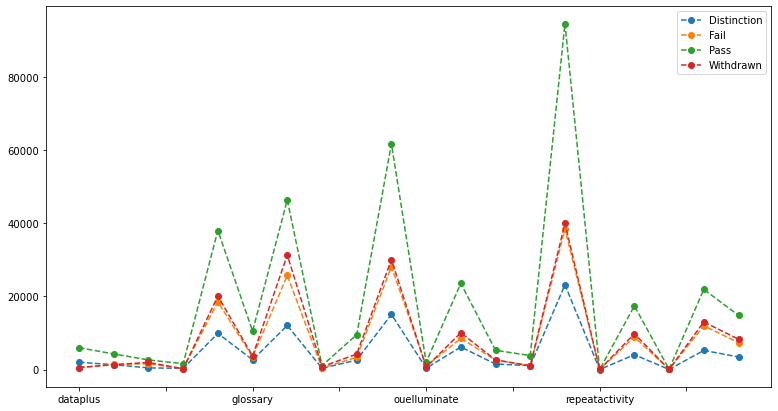

In [89]:
df2_grouped.iloc[0:,1:].stack().unstack("final_result").plot(figsize=(13,7), linestyle="dashed",marker="o")
plt.legend(loc="upper right")

In [90]:
df2_grouped.iloc[0:,1:].stack().unstack("final_result").corr()

final_result,Distinction,Fail,Pass,Withdrawn
final_result,,,,
Distinction,1.000000,0.986816,0.999065,0.976914
Fail,0.986816,1.000000,0.986796,0.997069
Pass,0.999065,0.986796,1.000000,0.975122
Withdrawn,0.976914,0.997069,0.975122,1.000000


    As plot graph shows, there are similar pattern in final results. Also, there are high statistically correllation between data.

## Prediction Part


### 2.1. Generate Features from Demographic Information

In [91]:
df2.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,80-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-40%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,20-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,40-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,40-60%,0-35,0,60,N,Pass


In [92]:
print(df2["highest_education"].value_counts())

A Level or Equivalent    13762
Lower Than A Level       12762
HE Qualification          4444
No Formal Quals            514
Name: highest_education, dtype: int64


In [93]:
print(df2["imd_band"].value_counts())

20-40%     7193
0-20%      6827
40-60%     6380
60-80%     5784
80-100%    5298
Name: imd_band, dtype: int64


In [94]:
print(df2["age_band"].value_counts())

0-35     22272
35-55     9009
55<=       201
Name: age_band, dtype: int64


In [95]:
print(df2["gender"].value_counts())

M    17067
F    14415
Name: gender, dtype: int64


I will create dummy variables from four different columns

In [96]:
a=pd.get_dummies(df2["highest_education"])
a

,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal Quals
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
32588,0,0,1,0
32589,0,0,1,0
32590,1,0,0,0
32591,0,0,1,0


In [97]:
b=pd.get_dummies(df2[["imd_band"]])
b

,imd_band_0-20%,imd_band_20-40%,imd_band_40-60%,imd_band_60-80%,imd_band_80-100%
0,0,0,0,0,1
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
32588,1,0,0,0,0
32589,0,0,1,0,0
32590,0,1,0,0,0
32591,0,0,0,0,1


In [98]:
c=pd.get_dummies(df2[["age_band"]])
c

,age_band_0-35,age_band_35-55,age_band_55<=
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
32588,1,0,0
32589,0,1,0
32590,1,0,0
32591,0,1,0


In [99]:
d=pd.get_dummies(df2[["gender"]])
d

,gender_F,gender_M
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
32588,1,0
32589,1,0
32590,1,0
32591,1,0


In [100]:
e=pd.get_dummies(df2[["disability"]])
e

,disability_N,disability_Y
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
32588,1,0
32589,1,0
32590,0,1
32591,1,0


In [101]:
machine_df=pd.concat([a,b,c,d,e],axis=1,join="inner")
machine_df

,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal Quals,imd_band_0-20%,imd_band_20-40%,imd_band_40-60%,imd_band_60-80%,imd_band_80-100%,age_band_0-35,age_band_35-55,age_band_55<=,gender_F,gender_M,disability_N,disability_Y
0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0
1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
2,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
3,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0
4,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
32589,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0
32590,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
32591,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


In [102]:
machine_df2=pd.concat([df2,machine_df],axis=1,join="inner")
machine_df2.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,imd_band_40-60%,imd_band_60-80%,imd_band_80-100%,age_band_0-35,age_band_35-55,age_band_55<=,gender_F,gender_M,disability_N,disability_Y
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,80-100%,55<=,0,240,...,0,0,1,0,0,1,0,1,1,0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-40%,35-55,0,60,...,0,0,0,0,1,0,1,0,1,0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,20-40%,35-55,0,60,...,0,0,0,0,1,0,1,0,0,1
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,40-60%,35-55,0,60,...,1,0,0,0,1,0,1,0,1,0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,40-60%,0-35,0,60,...,1,0,0,1,0,0,1,0,1,0


    I have created dummy variables and I have merged with df2. Now, I will merge with df3 and create one dataframe, but I will merge based on df3 because we fix final result in there.

In [103]:
df3.drop_duplicates(inplace=True)
machine_df2.drop_duplicates(inplace=True)
machine_df3=pd.merge(df3,machine_df2,on=["id_student","code_module","code_presentation","final_result"], how="left")
machine_df3.shape

(33933, 32)

In [104]:
machine_df3.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result,cut_regist,cut_unregist,gender,region,...,imd_band_40-60%,imd_band_60-80%,imd_band_80-100%,age_band_0-35,age_band_35-55,age_band_55<=,gender_F,gender_M,disability_N,disability_Y
0,AAA,2013J,11391,-159.0,NaN,Pass,Earlier-comers,NaN,M,East Anglian Region,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,AAA,2013J,28400,-53.0,NaN,Pass,Early-comers,NaN,F,Scotland,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,AAA,2013J,30268,-92.0,12.0,Withdrawn,Earlier-comers,first half-year,F,North Western Region,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,AAA,2013J,31604,-52.0,NaN,Pass,Early-comers,NaN,F,South East Region,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,AAA,2013J,32885,-176.0,NaN,Pass,Earlier-comers,NaN,F,West Midlands Region,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [105]:
df5.duplicated().any()

False

In [106]:
sum_df5=df5[["sum_click"]].groupby(df5["id_student"]).sum().reset_index()
sum_df5.head()

,id_student,sum_click
0,6516,2715
1,8462,643
2,11391,922
3,23629,153
4,23698,886


In [107]:
sum_df5["sum_click"].mean()

1470.5477870675768

In [108]:
sum_df5["sum_click"].max()

27922

In [109]:
machine_df3=pd.merge(machine_df3,sum_df5, on="id_student")
rang=[0,1470.55,27923]
label=["Lower than mean","Higher than mean"]
sum_df5["sum_click_cat"]=pd.cut(sum_df5["sum_click"],bins=rang,labels=label)
sum_df5.head()

,id_student,sum_click,sum_click_cat
0,6516,2715,Higher than mean
1,8462,643,Lower than mean
2,11391,922,Lower than mean
3,23629,153,Lower than mean
4,23698,886,Lower than mean


In [110]:
dummy_id=pd.get_dummies(sum_df5["sum_click_cat"])
dummy_id["id_student"]=sum_df5["id_student"]
dummy_id


,Lower than mean,Higher than mean,id_student
0,0,1,6516
1,1,0,8462
2,1,0,11391
3,1,0,23629
4,1,0,23698
...,...,...,...
26069,0,1,2698251
26070,1,0,2698257
26071,0,1,2698535
26072,1,0,2698577


In [111]:
machine_df3=pd.merge(machine_df3,dummy_id,on="id_student")
machine_df3.head()


,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result,cut_regist,cut_unregist,gender,region,...,age_band_0-35,age_band_35-55,age_band_55<=,gender_F,gender_M,disability_N,disability_Y,sum_click,Lower than mean,Higher than mean
0,AAA,2013J,11391,-159.0,NaN,Pass,Earlier-comers,NaN,M,East Anglian Region,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,922,1,0
1,AAA,2013J,28400,-53.0,NaN,Pass,Early-comers,NaN,F,Scotland,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1409,1,0
2,AAA,2013J,30268,-92.0,12.0,Withdrawn,Earlier-comers,first half-year,F,North Western Region,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,260,1,0
3,AAA,2013J,31604,-52.0,NaN,Pass,Early-comers,NaN,F,South East Region,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2007,0,1
4,AAA,2013J,32885,-176.0,NaN,Pass,Earlier-comers,NaN,F,West Midlands Region,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1012,1,0


    I have added additional dumy variables which explains whether student clicked much more than mean or not. 

In [112]:
pivot_lastdum2=pd.pivot_table(index=["id_student","Semester"],columns="activity_type",values="sum_click",data=df_last[["id_student","code_module","Year","Semester","activity_type","sum_click"]])
pivot_lastdum2

activity_type        dataplus  dualpane  externalquiz  folder   forumng  \
id_student Semester                                                       
6516       J             5.25       NaN           NaN     NaN  2.800000   
8462       J              NaN       NaN      1.333333     NaN  1.866667   
11391      J              NaN       NaN           NaN     NaN  3.770833   
23629      B              NaN       NaN           NaN     NaN  3.863636   
23698      J              NaN       NaN           NaN     NaN  1.513514   
...                       ...       ...           ...     ...       ...   
2698257    J              NaN       NaN           NaN     NaN  2.682540   
2698535    B              NaN       NaN           NaN     NaN  5.220339   
           J              NaN       2.0           NaN     NaN  6.183280   
2698577    J              NaN       NaN           NaN     NaN  5.150000   
2698588    J              NaN       NaN           NaN     NaN  2.695652   

activity_type        glossary  homepage  htmlactivity  oucollaborate  \
id_student Semester                                                    
6516       J              NaN  3.145570           NaN            NaN   
8462       J              NaN  3.603774           NaN       1.625000   
11391      J              NaN  3.450000           NaN            NaN   
23629      B              NaN  2.250000           NaN            NaN   
23698      J              NaN  1.753623           NaN            NaN   
...                       ...       ...           ...            ...   
2698257    J              NaN  2.462687           NaN            NaN   
2698535    B              NaN  2.882353           NaN            NaN   
           J              NaN  3.688679           NaN            NaN   
2698577    J              NaN  5.513514           NaN       1.666667   
2698588    J              NaN  3.717391           NaN       1.000000   

activity_type        oucontent  ouelluminate  ouwiki  page  questionnaire  \
id_student Semester                                                         
6516       J          8.175824           NaN     NaN   NaN            NaN   
8462       J          2.520000           NaN     4.0   NaN            NaN   
11391      J          7.089744           NaN     NaN   NaN            NaN   
23629      B               NaN           NaN     NaN   NaN            NaN   
23698      J          1.000000           NaN     NaN   1.0            NaN   
...                        ...           ...     ...   ...            ...   
2698257    J          3.727273           NaN     NaN   NaN            NaN   
2698535    B          1.500000           NaN     NaN   NaN            NaN   
           J          3.984536           NaN    11.9   NaN            NaN   
2698577    J          2.377551           NaN     NaN   NaN            NaN   
2698588    J          3.208955           NaN     NaN   NaN            NaN   

activity_type            quiz  repeatactivity  resource  sharedsubpage  \
id_student Semester                                                      
6516       J              NaN             NaN  1.631579            NaN   
8462       J              NaN             NaN  1.372549            NaN   
11391      J              NaN             NaN  1.181818            NaN   
23629      B         2.777778             NaN  1.000000            NaN   
23698      J         8.888889             NaN  1.050000            NaN   
...                       ...             ...       ...            ...   
2698257    J              NaN             NaN  1.200000            NaN   
2698535    B         9.258065             NaN  1.150000            NaN   
           J         9.636364             NaN  1.500000            NaN   
2698577    J         6.363636             NaN  1.266667            NaN   
2698588    J              NaN             NaN  1.361111            NaN   

activity_type         subpage       url  
id_student Semester                      
6516       J         1.958904  2.91836

In [113]:
pivot_lastdum2.isna().sum(axis=1).value_counts()

11    4919
13    4910
12    4323
10    2928
14    2772
9     1334
7     1166
15    1161
8     1074
6      990
16     696
17     391
19     258
18     256
5      180
4        2
dtype: int64

    My second additional predicter is whether student clicked more than 11 activity type or not.

In [114]:
pivot_lastdum2["click_more_types_or_not"]=np.where(pivot_lastdum2.notna().sum(axis=1)>11,"click_more_types", "click_less_types")
dum_pred2=pd.get_dummies(pivot_lastdum2["click_more_types_or_not"])
dum_pred2

click_less_types  click_more_types
id_student Semester                                    
6516       J                        1                 0
8462       J                        1                 0
11391      J                        1                 0
23629      B                        1                 0
23698      J                        1                 0
...                               ...               ...
2698257    J                        1                 0
2698535    B                        1                 0
           J                        1                 0
2698577    J                        1                 0
2698588    J                        1                 0

[27360 rows x 2 columns]

In [115]:
dum_pred2.reset_index(inplace=True)

In [116]:
dum_pred2.drop(columns="Semester",inplace=True)

In [117]:
dum_pred2["id_student"].duplicated().any()

True

In [118]:
dum_pred2.drop_duplicates(inplace=True)


In [119]:
machine_df3=pd.merge(machine_df3,dum_pred2,on="id_student")
machine_df3.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result,cut_regist,cut_unregist,gender,region,...,age_band_55<=,gender_F,gender_M,disability_N,disability_Y,sum_click,Lower than mean,Higher than mean,click_less_types,click_more_types
0,AAA,2013J,11391,-159.0,NaN,Pass,Earlier-comers,NaN,M,East Anglian Region,...,1.0,0.0,1.0,1.0,0.0,922,1,0,1,0
1,AAA,2013J,28400,-53.0,NaN,Pass,Early-comers,NaN,F,Scotland,...,0.0,1.0,0.0,1.0,0.0,1409,1,0,1,0
2,AAA,2013J,30268,-92.0,12.0,Withdrawn,Earlier-comers,first half-year,F,North Western Region,...,0.0,1.0,0.0,0.0,1.0,260,1,0,1,0
3,AAA,2013J,31604,-52.0,NaN,Pass,Early-comers,NaN,F,South East Region,...,0.0,1.0,0.0,1.0,0.0,2007,0,1,1,0
4,AAA,2013J,32885,-176.0,NaN,Pass,Earlier-comers,NaN,F,West Midlands Region,...,0.0,1.0,0.0,1.0,0.0,1012,1,0,1,0


In [120]:
machine_df3.duplicated().any()

False

In [121]:
df5.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,Semester,Year
0,AAA,2013J,28400,546652,-10,4,J,2013
1,AAA,2013J,28400,546652,-10,1,J,2013
3,AAA,2013J,28400,546614,-10,11,J,2013
4,AAA,2013J,28400,546714,-10,1,J,2013
5,AAA,2013J,28400,546652,-10,8,J,2013


    My last additional predictor is the whether student clicked more than 6 type of activity or not.

In [122]:
pivot_lastdum2["clickall_or_not"]=np.where(pivot_lastdum2.notna().sum(axis=1)>6,"click_6more", "click_6less")
dum_pred3=pd.get_dummies(pivot_lastdum2["clickall_or_not"])
dum_pred3

click_6less  click_6more
id_student Semester                          
6516       J                   0            1
8462       J                   0            1
11391      J                   0            1
23629      B                   1            0
23698      J                   0            1
...                          ...          ...
2698257    J                   0            1
2698535    B                   0            1
           J                   0            1
2698577    J                   0            1
2698588    J                   0            1

[27360 rows x 2 columns]

In [123]:
dum_pred3=pd.get_dummies(pivot_lastdum2["clickall_or_not"]).reset_index()


In [124]:
dum_pred3.drop(columns="Semester",inplace=True)

In [125]:
machine_df3=pd.merge(machine_df3,dum_pred3,on="id_student")
machine_df3.head()



,code_module,code_presentation,id_student,date_registration,date_unregistration,final_result,cut_regist,cut_unregist,gender,region,...,gender_M,disability_N,disability_Y,sum_click,Lower than mean,Higher than mean,click_less_types,click_more_types,click_6less,click_6more
0,AAA,2013J,11391,-159.0,NaN,Pass,Earlier-comers,NaN,M,East Anglian Region,...,1.0,1.0,0.0,922,1,0,1,0,0,1
1,AAA,2013J,28400,-53.0,NaN,Pass,Early-comers,NaN,F,Scotland,...,0.0,1.0,0.0,1409,1,0,1,0,0,1
2,AAA,2013J,30268,-92.0,12.0,Withdrawn,Earlier-comers,first half-year,F,North Western Region,...,0.0,0.0,1.0,260,1,0,1,0,0,1
3,AAA,2013J,31604,-52.0,NaN,Pass,Early-comers,NaN,F,South East Region,...,0.0,1.0,0.0,2007,0,1,1,0,0,1
4,AAA,2013J,32885,-176.0,NaN,Pass,Earlier-comers,NaN,F,West Midlands Region,...,0.0,1.0,0.0,1012,1,0,1,0,0,1


### Testing the Model

In [126]:
machine_df3.columns

Index(['code_module', 'code_presentation', 'id_student', 'date_registration',
       'date_unregistration', 'final_result', 'cut_regist', 'cut_unregist',
       'gender', 'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability',
       'A Level or Equivalent', 'HE Qualification', 'Lower Than A Level',
       'No Formal Quals', 'imd_band_0-20%', 'imd_band_20-40%',
       'imd_band_40-60%', 'imd_band_60-80%', 'imd_band_80-100%',
       'age_band_0-35', 'age_band_35-55', 'age_band_55<=', 'gender_F',
       'gender_M', 'disability_N', 'disability_Y', 'sum_click',
       'Lower than mean', 'Higher than mean', 'click_less_types',
       'click_more_types', 'click_6less', 'click_6more'],
      dtype='object')

In [127]:
machine_df3.replace(np.nan,0,inplace=True)

In [128]:
machine_df3["final_result"].value_counts()

Pass           13701
Withdrawn      11215
Fail            7536
Distinction     3539
Name: final_result, dtype: int64

In [129]:
new_row={"Pass":"Pass","Distinction":"Pass","Fail":"Fail","Withdrawn":"Fail"}

In [130]:

machine_df3["final_result"]=machine_df3["final_result"].map(new_row)

In [131]:
machine_df3["final_result"].value_counts()

Fail    18751
Pass    17240
Name: final_result, dtype: int64

    I have replaced nan values and I will drop final_result into two variables

In [132]:
X=machine_df3.drop(['code_module', 'code_presentation', 'id_student', 'date_registration',
       'date_unregistration', 'final_result', 'cut_regist', 'cut_unregist',
       'gender', 'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability',"sum_click"],axis=1)
y=machine_df3["final_result"]



In [133]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(X, y, random_state=0)
print(len(X_train),len(X_test))

26993 8998


In [134]:
knn_classifier=sklearn.neighbors.KNeighborsClassifier(n_neighbors=55)
knn_classifier.fit(X_train,y_train)
knn_classifier.score(X_test,y_test)
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn_classifier,X,y, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[0.65638889 0.65962767 0.66657405 0.67463184 0.69241456 0.67129758
 0.65851625 0.76243401 0.80494582 0.61405946]
Accuracy: 0.69 (+/- 0.05)


In [135]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(X, y, random_state=0, test_size=0.33)
print(len(X_train),len(X_test))

classifier=linear_model.LogisticRegression(penalty="l1", solver="liblinear", tol=0.05,random_state=0)
classifier.fit(X_train, y_train)

predicted=classifier.predict(X_test)
print(sklearn.metrics.accuracy_score(y_test, predicted))

24113 11878
0.6896783970365381


Accuracy of the model is %68, which is  high.

In [136]:
print("Logistic--------------------------------------------")
print("Classification report for classifier %s: \n%s\n"
%(classifier,sklearn.metrics.classification_report(y_test, predicted)))
print("Confusion matrix: \n%s"% sklearn.metrics.confusion_matrix(y_test, predicted))

Logistic--------------------------------------------
Classification report for classifier LogisticRegression(penalty='l1', random_state=0, solver='liblinear', tol=0.05): 
              precision    recall  f1-score   support

        Fail       0.70      0.74      0.72      6294
        Pass       0.68      0.64      0.66      5584

    accuracy                           0.69     11878
   macro avg       0.69      0.69      0.69     11878
weighted avg       0.69      0.69      0.69     11878


Confusion matrix: 
[[4632 1662]
 [2024 3560]]


According to confusion matrix, whereas 4632 students are predicted correctly, which total students' number is 6294, 2024 students are predicted wrongly. There is also a similar rate in pass which 3560 students are predicted correctly,which total students' number is 5584, while 2024 students are predicted wrongly.

In [137]:
feature_importance=pd.DataFrame()
feature_importance["coef_"]=pd.DataFrame(data={"coef_": classifier.coef_[0]})[["coef_"]]
feature_importance["feature"]=X.columns
print(feature_importance)

       coef_                feature
0   0.643485  A Level or Equivalent
1   0.661525       HE Qualification
2   0.187454     Lower Than A Level
3   0.100289        No Formal Quals
4   0.072848         imd_band_0-20%
5   0.277795        imd_band_20-40%
6   0.409288        imd_band_40-60%
7   0.554754        imd_band_60-80%
8   0.642757       imd_band_80-100%
9   0.260119          age_band_0-35
10  0.377716         age_band_35-55
11  0.302970          age_band_55<=
12  0.485762               gender_F
13 -0.247187               gender_M
14  0.313411           disability_N
15 -0.218423           disability_Y
16 -1.101634        Lower than mean
17  0.315254       Higher than mean
18 -0.186109       click_less_types
19  0.097607       click_more_types
20 -2.439000            click_6less
21 -0.370291            click_6more


    Basend on the coefficients, if the clicking sum of types of activity is lower than average, and even if it is less than 6, students' performance is predicted to drop highly. On the other hand, if students are in A Level or Equivalent or HE Qualification, their performance is predicted to be high. Also, imd_band_80-100% is also high rate indicator to predict.